In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Border_Crossing_Entry_Data.csv")
df

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)
...,...,...,...,...,...,...,...,...,...,...
405967,Opheim,Montana,3317,US-Canada Border,Nov 2025,Personal Vehicle Passengers,189,49.000,-106.378,POINT (-106.377583 48.999527)
405968,Limestone,Maine,118,US-Canada Border,Nov 2025,Trucks,60,46.925,-67.790,POINT (-67.789597 46.924555)
405969,Van Buren,Maine,108,US-Canada Border,Nov 2025,Trains,30,47.160,-67.931,POINT (-67.930799 47.159645)
405970,Ferry,Washington,3013,US-Canada Border,Nov 2025,Personal Vehicles,487,49.000,-118.761,POINT (-118.761166 49.000083)


In [2]:
df.head()
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405972 entries, 0 to 405971
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  405972 non-null  object 
 1   State      405967 non-null  object 
 2   Port Code  405972 non-null  int64  
 3   Border     405972 non-null  object 
 4   Date       405972 non-null  object 
 5   Measure    405972 non-null  object 
 6   Value      405972 non-null  int64  
 7   Latitude   405965 non-null  float64
 8   Longitude  405965 non-null  float64
 9   Point      405965 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 21.7+ MB


,Port Code,Value,Latitude,Longitude
count,405972.000000,4.059720e+05,405965.000000,405965.000000
mean,2444.899609,2.913417e+04,43.957365,-99.701705
std,1204.678485,1.494534e+05,8.155044,18.262828
min,101.000000,0.000000e+00,25.952000,-141.001000
25%,2304.000000,0.000000e+00,42.999000,-114.728000
50%,3012.000000,1.550000e+02,48.122000,-101.628000
75%,3401.000000,3.113000e+03,49.000000,-84.361000
max,3814.000000,4.447374e+06,62.615000,-66.980000


In [3]:
df.shape

(405972, 10)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Port Code,405972.0,2444.899609,1204.678485,101.000,2304.000,3012.000,3401.000,3814.000
Value,405972.0,29134.166812,149453.405577,0.000,0.000,155.000,3113.000,4447374.000
Latitude,405965.0,43.957365,8.155044,25.952,42.999,48.122,49.000,62.615
Longitude,405965.0,-99.701705,18.262828,-141.001,-114.728,-101.628,-84.361,-66.980


In [5]:
print("Null Count: ",df.isnull().sum())

Null Count:  Port Name    0
State        5
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     7
Longitude    7
Point        7
dtype: int64


In [6]:
print("Duplicated Row Count", df.duplicated().sum())

Duplicated Row Count 10


In [7]:
df = df.drop_duplicates().reset_index(drop = True)

In [8]:
df.shape

(405962, 10)

In [9]:
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

df.columns

Index(['port_name', 'state', 'port_code', 'border', 'date', 'measure', 'value',
       'latitude', 'longitude', 'point'],
      dtype='object')

In [10]:
critical_cols = ['port_name' , 'state', 'border', 'date', 'measure', 'value']
df = df.dropna(subset = critical_cols)

In [11]:
df['border'].value_counts()

border
US-Canada Border    310041
US-Mexico Border     95916
Name: count, dtype: int64

In [12]:
df['measure'].value_counts()

measure
Personal Vehicles              38756
Personal Vehicle Passengers    38731
Trucks                         37573
Truck Containers Empty         37277
Truck Containers Loaded        36740
Pedestrians                    33095
Buses                          32059
Bus Passengers                 32040
Trains                         30107
Rail Containers Empty          30085
Rail Containers Loaded         29979
Train Passengers               29515
Name: count, dtype: int64

In [13]:
df.groupby('border')['value'].sum()

border
US-Canada Border    3102090812
US-Mexico Border    8723872886
Name: value, dtype: int64

In [14]:
df.groupby('measure')['value'].mean().sort_values(ascending=False)

measure
Personal Vehicle Passengers    166910.969069
Personal Vehicles               80633.669342
Pedestrians                     39090.897900
Trucks                           8983.888723
Truck Containers Loaded          6983.988732
Bus Passengers                   4978.323533
Truck Containers Empty           2345.941573
Rail Containers Loaded           1763.097135
Rail Containers Empty            1013.852451
Buses                             296.921707
Train Passengers                  253.940403
Trains                             36.966453
Name: value, dtype: float64

In [15]:
df['measure'].value_counts().head(10)

measure
Personal Vehicles              38756
Personal Vehicle Passengers    38731
Trucks                         37573
Truck Containers Empty         37277
Truck Containers Loaded        36740
Pedestrians                    33095
Buses                          32059
Bus Passengers                 32040
Trains                         30107
Rail Containers Empty          30085
Name: count, dtype: int64

In [16]:
df.groupby('state')['value'].sum().sort_values(ascending=False).head(10)

state
Texas           4400231638
California      3141319032
Arizona         1092879527
New York         956477986
Michigan         864122695
Washington       584315162
Maine            256014175
Vermont          132433991
Minnesota        110849917
North Dakota      91564279
Name: value, dtype: int64

In [17]:
df['Date'] = pd.to_datetime(df['date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

<ipython-input-17-ad47d733f954>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['date'])


In [18]:
df.groupby('Year')['value'].sum()

Year
1996    429790351
1997    494174198
1998    508588404
1999    538456724
2000    540021542
2001    493083902
2002    475702818
2003    456392653
2004    458220298
2005    450234268
2006    440296022
2007    417587175
2008    399902033
2009    359451762
2010    344246536
2011    332226000
2012    344503916
2013    356218438
2014    363314116
2015    365219998
2016    367484183
2017    372971276
2018    379157157
2019    368542304
2020    200531716
2021    224159112
2022    310481511
2023    347890030
2024    366523458
2025    320591797
Name: value, dtype: int64

In [19]:
df.groupby('Month')['value'].mean()

Month
1     27550.356444
2     25691.157028
3     29322.523410
4     28081.507046
5     29530.199724
6     29128.170323
7     31817.839513
8     32499.697738
9     28726.077645
10    29197.722911
11    28402.839418
12    29648.348917
Name: value, dtype: float64

In [20]:
pd.pivot_table(
    df,
    values = 'value' ,
    index  = 'measure' ,
    columns = 'border' ,
    aggfunc = 'sum'
)

border,US-Canada Border,US-Mexico Border
measure,,
Bus Passengers,79370634,80134852
Buses,3335358,6183655
Pedestrians,14495775,1279217491
Personal Vehicle Passengers,1740866739,4723762004
Personal Vehicles,842278595,2282759894
Rail Containers Empty,17622723,12879028
Rail Containers Loaded,41522060,11333829
Train Passengers,7134892,360159
Trains,837850,275099


In [21]:
df.groupby('port_name')['value'].sum().sort_values(ascending=False)

port_name
San Ysidro    1437926840
El Paso       1323134502
Laredo         806819787
Hidalgo        671907664
Calexico       626071253
                 ...    
Whitetail         160092
Boquillas         135606
Whitlash           76443
Aberdeen              10
Albany                 2
Name: value, Length: 118, dtype: int64

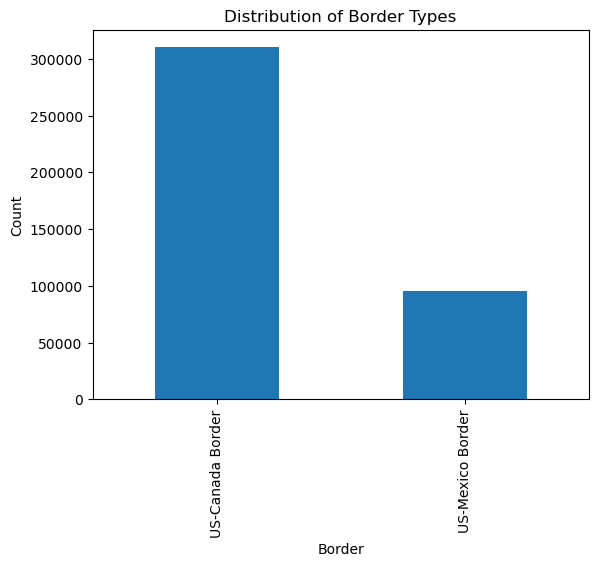

In [22]:
plt.figure()
df['border'].value_counts().plot(kind='bar')
plt.title("Distribution of Border Types")
plt.xlabel("Border")
plt.ylabel("Count")
plt.show()

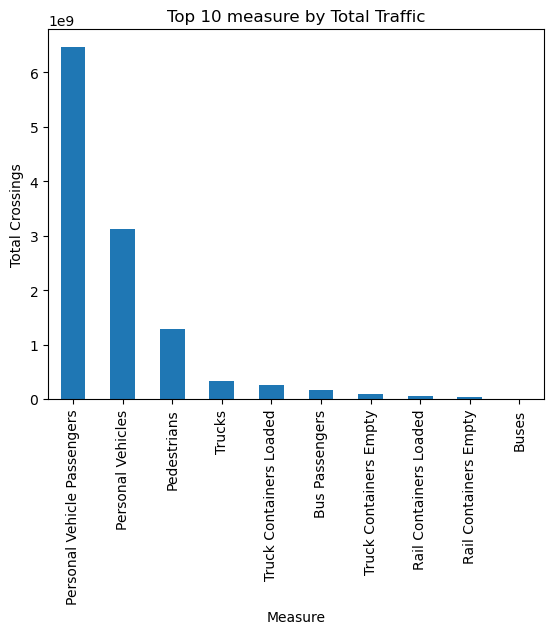

In [23]:
plt.figure()
df.groupby('measure')['value'].sum()\
    .sort_values(ascending=False)\
    .head(10)\
    .plot(kind='bar')
plt.title("Top 10 measure by Total Traffic")
plt.xlabel("Measure")
plt.ylabel("Total Crossings")
plt.show()